In [2]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

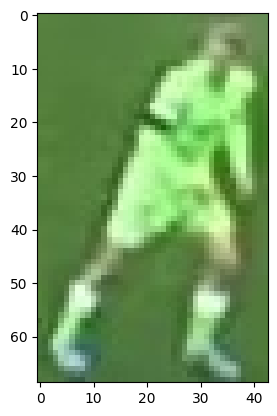

In [4]:
plt.imshow(image)

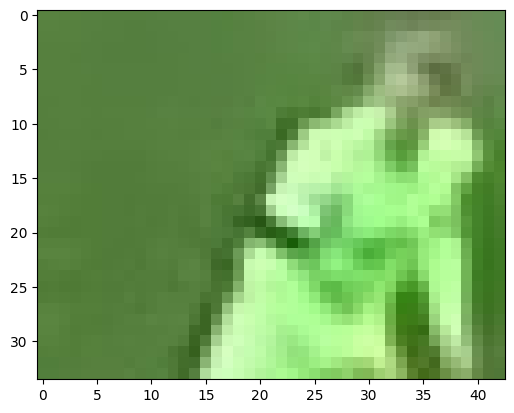

In [5]:
#taking top half as we need the tshirt color recognition
top_half_img = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_img)

c:\Users\hrish\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


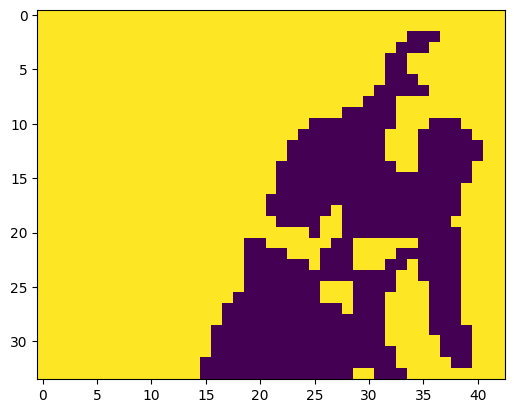

In [6]:
#cluster into background and tshirt color 
#then get average of tshirt color to get color to classify into teams

#reshape to 2d array 
image_2d =  top_half_img.reshape(-1, 3)

#to do kmeans clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

#cluster labels
labels = kmeans.labels_

#reshape the labels into the original image shape
clustered_img = labels.reshape(top_half_img.shape[0], top_half_img.shape[1])

#display clustered image 
plt.imshow(clustered_img)
plt.show()

In [7]:
#getting avg color now 
#get class for corners to get the background class for clustered 

corner = [clustered_img[0,0], clustered_img[0, -1], clustered_img[-1, 0], clustered_img[-1, -1]]
non_player_cluster = max(set(corner), key=corner.count)

print(non_player_cluster)

1


In [8]:
player_cluster = 1 - non_player_cluster
print(player_cluster)

0


In [10]:
kmeans.cluster_centers_[player_cluster]

array([169.28746929, 233.09336609, 143.58968059])